# cutoff=0.01

In [2]:
import pickle
import matplotlib.pyplot as plt
import sys
from kmer_ml_package.visualization import plot_confidence_interval
import numpy as np

{'HA': 2, 'HH': 1, 'AA': 0}


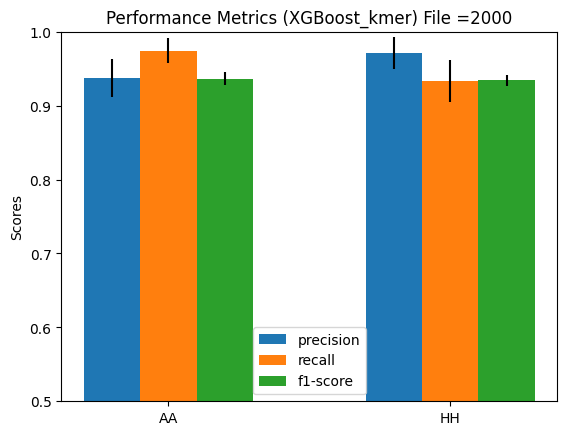

In [2]:
def load_data_from_pickle(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)
    
flag = ['precision', 'recall', 'f1-score']
# Define the correspondence between cut-offs and suffix numbers

filename = f'HAHHresult_kmer_cutoff0.01_file1.pkl'

datasets = load_data_from_pickle(filename)
class_label = datasets['class_label']

# for cut_off, suffix in cut_off_to_suffix.items():
#     filename = f'HHAAresult_kmer_cutoff{cut_off}_file-1_2023{suffix}.pkl'
#     datasets[f'{cut_off}_{suffix}'] = load_data_from_pickle(filename)
#     class_label = load_data_from_pickle(filename)['class_label']

# fig, ax = plt.subplots()
width = 0.35
bars_per_dataset = len(flag) * len(key)
group_width = len(flag) * width

report = datasets['kfold_dataset']['report']
report_dataset = plot_confidence_interval(class_label, report)

report_ave = report_dataset['report_ave']
report_low = report_dataset['report_low']
report_up = report_dataset['report_up']

x = np.arange(2)
width = 0.2

tmp = []  # Temporary list to store labels with values <= 1
    
# Extracting keys (labels) from datalabel where the value is <= 1
for k in class_label:
    if class_label.get(k) <= 1:
        tmp.append(k)
key = tmp.copy()
# Re-arranging keys in 'key' dictionary based on values in datalabel
for i in range(len(key)):
    key[class_label[tmp[i]]] = tmp[i]

fig, ax = plt.subplots()
flag = ['precision', 'recall', 'f1-score']
for i, fg in enumerate(flag):
    vals = [report_ave[name][0][fg][0] for name in key]
    errs = [
        (report_ave[name][0][fg][0] - report_low[name][0][fg][0],
         report_up[name][0][fg][0] - report_ave[name][0][fg][0])  for name in key]
    ax.bar(x + i * width, vals, width, label=fg, yerr=np.transpose(errs))
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics (XGBoost_kmer) File =2000')
ax.set_xticks(x + width)
ax.set_xticklabels(key)
ax.set_ylim([0.5,1])
ax.legend()
plt.savefig('f2000all.png', dpi=300) 
plt.show()